<a href="https://colab.research.google.com/github/sheikhomer/FoodHubDataAnalysis/blob/main/Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Python Foundations: FoodHub Data Analysis

### Context

The number of restaurants in New York is increasing day by day. Lots of students and busy professionals rely on those restaurants due to their hectic lifestyles. Online food delivery service is a great option for them. It provides them with good food from their favorite restaurants. A food aggregator company FoodHub offers access to multiple restaurants through a single smartphone app.

The app allows the restaurants to receive a direct online order from a customer. The app assigns a delivery person from the company to pick up the order after it is confirmed by the restaurant. The delivery person then uses the map to reach the restaurant and waits for the food package. Once the food package is handed over to the delivery person, he/she confirms the pick-up in the app and travels to the customer's location to deliver the food. The delivery person confirms the drop-off in the app after delivering the food package to the customer. The customer can rate the order in the app. The food aggregator earns money by collecting a fixed margin of the delivery order from the restaurants.

### Objective

The food aggregator company has stored the data of the different orders made by the registered customers in their online portal. They want to analyze the data to get a fair idea about the demand of different restaurants which will help them in enhancing their customer experience. Suppose you are hired as a Data Scientist in this company and the Data Science team has shared some of the key questions that need to be answered. Perform the data analysis to find answers to these questions that will help the company to improve the business.

### Data Description

The data contains the different data related to a food order. The detailed data dictionary is given below.

### Data Dictionary

* order_id: Unique ID of the order
* customer_id: ID of the customer who ordered the food
* restaurant_name: Name of the restaurant
* cuisine_type: Cuisine ordered by the customer
* cost_of_the_order: Cost of the order
* day_of_the_week: Indicates whether the order is placed on a weekday or weekend (The weekday is from Monday to Friday and the weekend is Saturday and Sunday)
* rating: Rating given by the customer out of 5
* food_preparation_time: Time (in minutes) taken by the restaurant to prepare the food. This is calculated by taking the difference between the timestamps of the restaurant's order confirmation and the delivery person's pick-up confirmation.
* delivery_time: Time (in minutes) taken by the delivery person to deliver the food package. This is calculated by taking the difference between the timestamps of the delivery person's pick-up confirmation and drop-off information

### Let us start by importing the required libraries

In [1]:
# Installing the libraries with the specified version.
# !pip install numpy==1.25.2 pandas==1.5.3 matplotlib==3.7.1 seaborn==0.13.1 -q --user
# Commented out the above line for installation, because, Google Collab comes with updated version of numpy,pandas, matplotlin and seaborn installed

**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [55]:
# import libraries for data manipulation
import numpy as np
import pandas as pd

# import libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

### Understanding the structure of the data

In [3]:
# uncomment and run the following lines for Google Colab
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
# Write your code here to read the data
df = pd.read_csv('/content/drive/MyDrive/AI_ML_PGP/Projects/FoodHubDataAnalysis/foodhub_order.csv')

In [5]:
# Write your code here to view the first 5 rows
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


### **Question 1:** How many rows and columns are present in the data? [0.5 mark]

In [6]:
# Write your code here
df.shape

(1898, 9)

#### Observations:
* There are 1898 rows in the dataset
* There are 9 columns in the dataset


### **Question 2:** What are the datatypes of the different columns in the dataset? (The info() function can be used) [0.5 mark]

In [7]:
# Write your code here
df.info() # summary of the dataframe and its data structures

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1898 entries, 0 to 1897
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   order_id               1898 non-null   int64  
 1   customer_id            1898 non-null   int64  
 2   restaurant_name        1898 non-null   object 
 3   cuisine_type           1898 non-null   object 
 4   cost_of_the_order      1898 non-null   float64
 5   day_of_the_week        1898 non-null   object 
 6   rating                 1898 non-null   object 
 7   food_preparation_time  1898 non-null   int64  
 8   delivery_time          1898 non-null   int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 133.6+ KB


In [8]:
df.head() # print first 5 columns

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24


In [9]:
df.tail() # print last 5 columns

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time
1893,1476701,292602,Chipotle Mexican Grill $1.99 Delivery,Mexican,22.31,Weekend,5,31,17
1894,1477421,397537,The Smile,American,12.18,Weekend,5,31,19
1895,1477819,35309,Blue Ribbon Sushi,Japanese,25.22,Weekday,Not given,31,24
1896,1477513,64151,Jack's Wife Freda,Mediterranean,12.18,Weekday,5,23,31
1897,1478056,120353,Blue Ribbon Sushi,Japanese,19.45,Weekend,Not given,28,24


#### Observations:
* order_id, customer_id, food_preparation_time and delivery_time columns have data type int64(64-bit integer)
* cost_of_the_order column has data type float64(64-bit floating point number)
* restaurant_name, cuisine_type, day_of_the_week and rating columns have data type object
* rating column is not a numeric column rather it is a column with data type object

### **Question 3:** Are there any missing values in the data? If yes, treat them using an appropriate method. [1 mark]

#### Checking for missing values (NaN, Null and Empty values)

In [10]:
# Write your code here
df.isnull().sum() # Checking for missing values (Nan and Null values)

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


In [11]:
df.eq('').sum() # check the number of empty strings in the dataframe

,0
order_id,0
customer_id,0
restaurant_name,0
cuisine_type,0
cost_of_the_order,0
day_of_the_week,0
rating,0
food_preparation_time,0
delivery_time,0


* Dataframe doesn't contain any missing value and empty string
* Given the rating column is not numeric, we want to further analyse it for missing value

#### Analyse the rating column for missing value

In [12]:
df['rating'].unique() # check the unique values in the rating column

array(['Not given', '5', '3', '4'], dtype=object)

* 'Not given' is not a missing value and we can do categorical data analysis of this column given we have only 4 unique data points
* For numerical analysis of rating column, we can create a separate column with data type int by replacing 'Not given' with 0.

In [13]:
df['numerical_rating'] = df['rating'].replace('Not given', 0) # new column 'numerical_rating' with value 0 as replacement of 'Not given'
df['numerical_rating'] = df['numerical_rating'].astype(int) # convert the data type to int for 'numerical_rating' column
df.head()

,order_id,customer_id,restaurant_name,cuisine_type,cost_of_the_order,day_of_the_week,rating,food_preparation_time,delivery_time,numerical_rating
0,1477147,337525,Hangawi,Korean,30.75,Weekend,Not given,25,20,0
1,1477685,358141,Blue Ribbon Sushi Izakaya,Japanese,12.08,Weekend,Not given,25,23,0
2,1477070,66393,Cafe Habana,Mexican,12.23,Weekday,5,23,28,5
3,1477334,106968,Blue Ribbon Fried Chicken,American,29.20,Weekend,3,25,15,3
4,1478249,76942,Dirty Bird to Go,American,11.59,Weekday,4,25,24,4


#### Observations:
* Dataframe doesn't contain any missing value and empty string
* 'rating' column can be analysed categorically as it has only 4 unique data points. 'Not given' should not be treated as a missing value
* For numerical analysis of rating column, we can create a separate column with data type float by replacing 'Not given' with 0. Given the dataset has only 3 unqiue numerical values for rating and those are 5,3 and 4, we are making an assumption that rating 0 means 'Not given' and rating value starts from 1

### **Question 4:** Check the statistical summary of the data. What is the minimum, average, and maximum time it takes for food to be prepared once an order is placed? [2 marks]

In [28]:
# Write your code here
df.describe(include = 'all').T # Ge the statistical summary in a transposed dataframe

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
order_id,1898.0,NaN,NaN,NaN,1477495.5,548.049724,1476547.0,1477021.25,1477495.5,1477969.75,1478444.0
customer_id,1898.0,NaN,NaN,NaN,171168.478398,113698.139743,1311.0,77787.75,128600.0,270525.0,405334.0
restaurant_name,1898,178,Shake Shack,219,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cuisine_type,1898,14,American,584,NaN,NaN,NaN,NaN,NaN,NaN,NaN
cost_of_the_order,1898.0,NaN,NaN,NaN,16.498851,7.483812,4.47,12.08,14.14,22.2975,35.41
day_of_the_week,1898,2,Weekend,1351,NaN,NaN,NaN,NaN,NaN,NaN,NaN
rating,1898,4,Not given,736,NaN,NaN,NaN,NaN,NaN,NaN,NaN
food_preparation_time,1898.0,NaN,NaN,NaN,27.37197,4.632481,20.0,23.0,27.0,31.0,35.0
delivery_time,1898.0,NaN,NaN,NaN,24.161749,4.972637,15.0,20.0,25.0,28.0,33.0
numerical_rating,1898.0,NaN,NaN,NaN,2.659642,2.19528,0.0,0.0,4.0,5.0,5.0


#### Observations:
* It is observed that minimum food preparation time is 20 minute, maximum food preparation time is 35 minute and average food preparation time 27.37 minute
* It is also observed that top restaurant is Shake Shack and top cuisine_type is American.
* Most of the orders are placed in the weekend


### **Question 5:** How many orders are not rated? [1 mark]

In [36]:
# Write the code here
# count of orders not rated and its percentage
pd.DataFrame({
    'count': [(df['rating'] == 'Not given').sum()],
    'percentage': [(df['rating'] == 'Not given').sum()/df.shape[0]*100]
})

,count,percentage
0,736,38.777661


#### Observations:
* 736 orders are not rated which is 38.77%

### Exploratory Data Analysis (EDA)

### Univariate Analysis

### **Question 6:** Explore all the variables and provide observations on their distributions. (Generally, histograms, boxplots, countplots, etc. are used for univariate exploration.) [9 marks]

#### Univariate analysis categrorical data

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 140 (\x8c) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 142 (\x8e) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


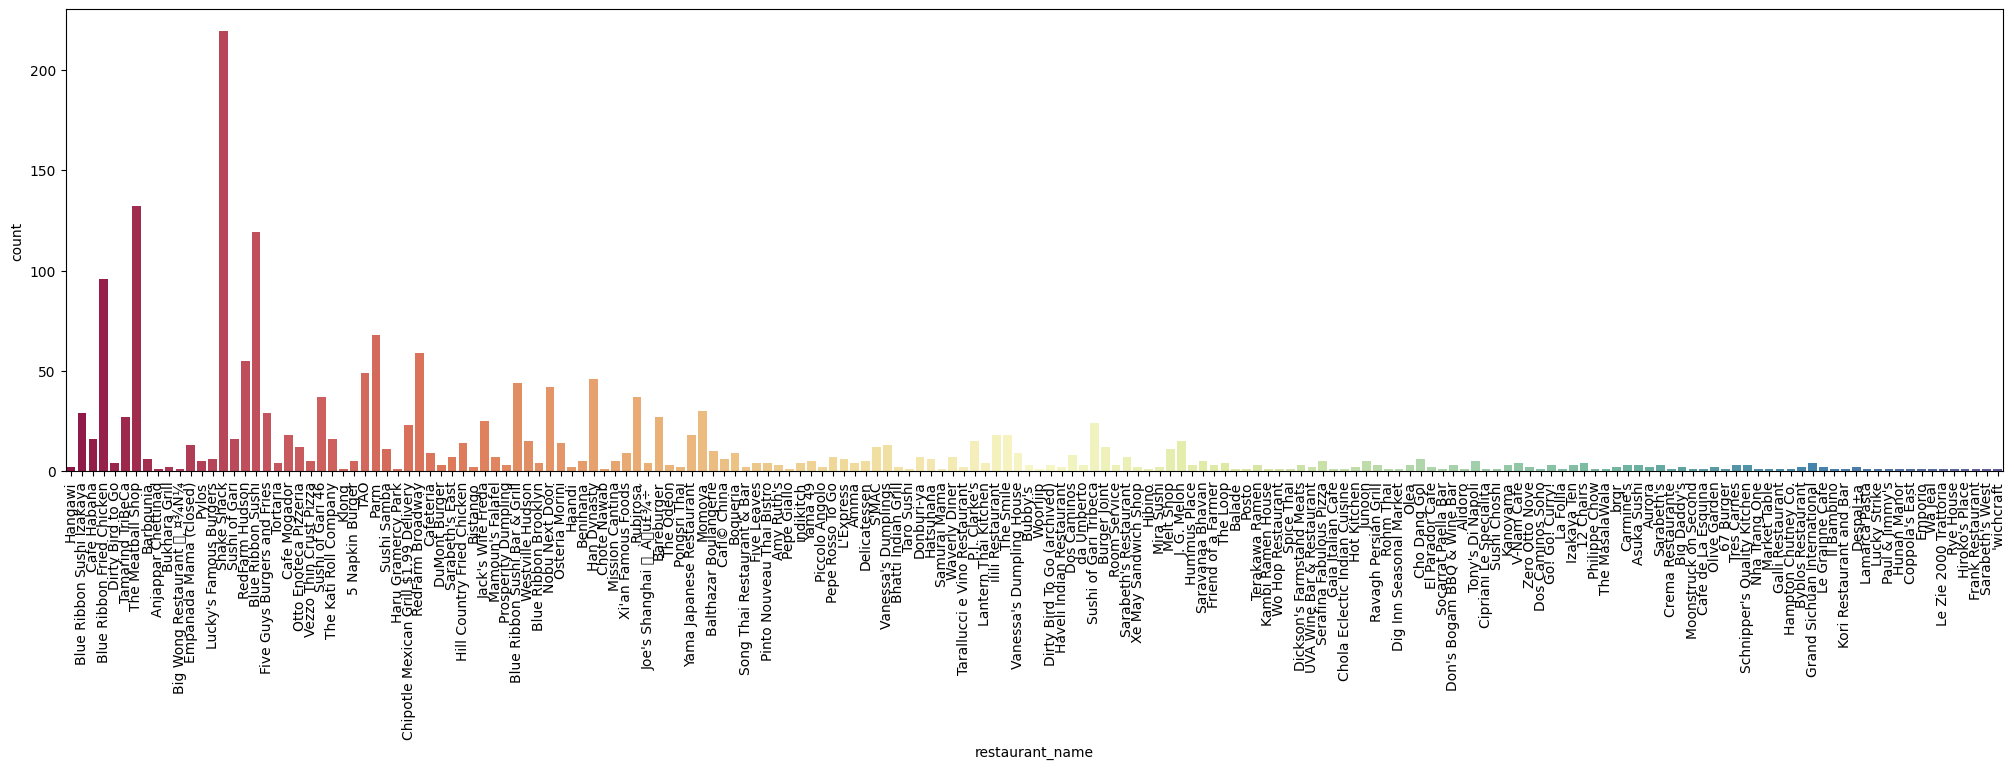

In [52]:
# Write the code here
plt.figure(figsize = (25,6))
sns.countplot(x = 'restaurant_name', data = df, hue = 'restaurant_name', legend = False, palette='Spectral') # countplot for restaurant_name
plt.xticks(rotation = 90,)
plt.show()

In [63]:
restaurant_counts = df['restaurant_name'].value_counts().reset_index()
restaurant_counts.columns = ['restaurant_name', 'count']
bar = px.bar(restaurant_counts, x='restaurant_name', y = 'count')
bar.show()

* Shake Shack is the most popular restaurant, followed by the Meatball Soup

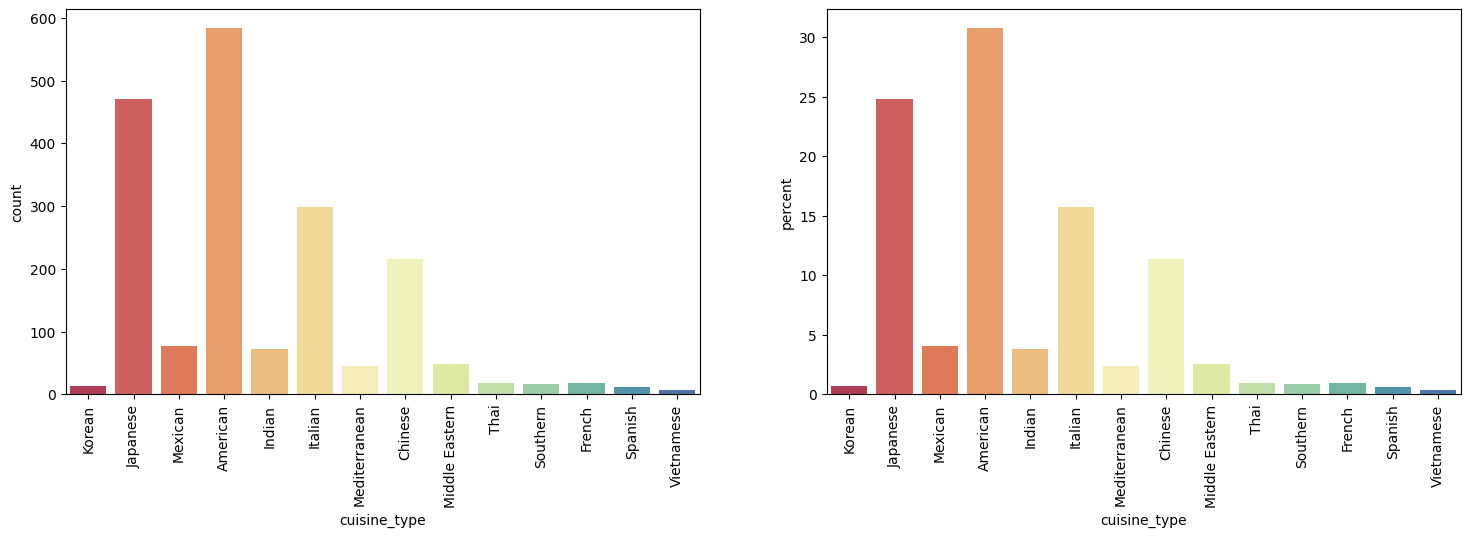

In [73]:
plt.figure(figsize = (18,5))
plt.subplot(1,2,1)
sns.countplot(x = 'cuisine_type', data = df, hue = 'cuisine_type', legend = False, palette='Spectral') # countplot for cuisine_type
plt.xticks(rotation = 90)
plt.subplot(1,2,2)
sns.countplot(x = 'cuisine_type', data = df, hue = 'cuisine_type', legend = False, palette='Spectral', stat='percent') # countplot for cuisine_type with stat percentage
plt.xticks(rotation = 90)
plt.show()

* Most popular cuisine is American,followed by Japanese, Italian and Chinese
* It is observed that there are total 14 cuisine type. American and Japanese cuisine counts for more than 50% order

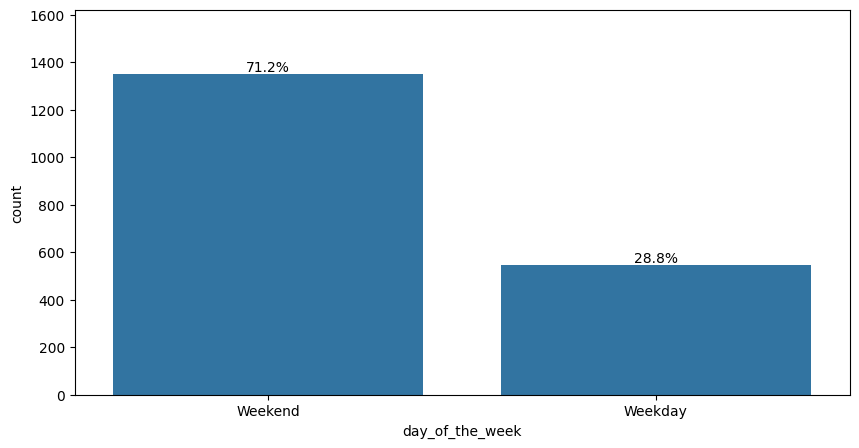

In [68]:
plt.figure(figsize = (10,5))
ax = sns.countplot(x = 'day_of_the_week', data = df) # countplot for day_of_the_week
total = df['day_of_the_week'].count()
ax.bar_label(ax.containers[0], fmt = lambda x: f'{(x/total)*100:0.1f}%')
ax.margins(y=0.2)
plt.show()

* Just over 71% orders are placed over the weekend

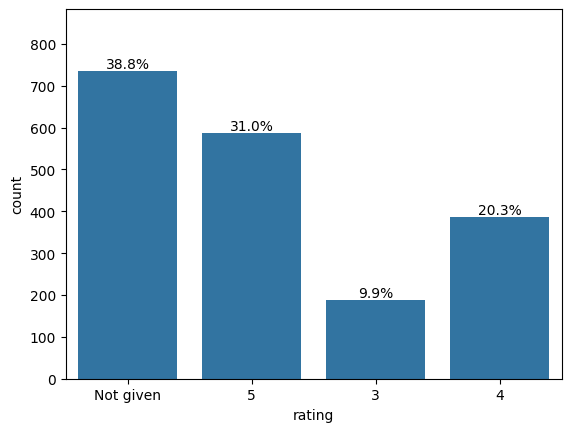

In [71]:
ax = sns.countplot(x = 'rating', data = df) # countplot for rating
total = df['rating'].count()
ax.bar_label(ax.containers[0], fmt = lambda x: f'{(x/total)*100:0.1f}%')
ax.margins(y=0.2)
plt.show()

* 38.8% of all orders are not rated
* 31% of all orders are rated 5, 20.3% of all orders are rated 4 and 9.9% of all orders are rated 3

#### Univariate Analysis of numerical data

### **Question 7**: Which are the top 5 restaurants in terms of the number of orders received? [1 mark]

In [17]:
# Write the code here

#### Observations:


### **Question 8**: Which is the most popular cuisine on weekends? [1 mark]

In [18]:
# Write the code here

#### Observations:


### **Question 9**: What percentage of the orders cost more than 20 dollars? [2 marks]

In [19]:
# Write the code here

#### Observations:


### **Question 10**: What is the mean order delivery time? [1 mark]

In [20]:
# Write the code here

#### Observations:


### **Question 11:** The company has decided to give 20% discount vouchers to the top 3 most frequent customers. Find the IDs of these customers and the number of orders they placed. [1 mark]

In [21]:
# Write the code here

#### Observations:


### Multivariate Analysis

### **Question 12**: Perform a multivariate analysis to explore relationships between the important variables in the dataset. (It is a good idea to explore relations between numerical variables as well as relations between numerical and categorical variables) [10 marks]


In [22]:
# Write the code here

### **Question 13:** The company wants to provide a promotional offer in the advertisement of the restaurants. The condition to get the offer is that the restaurants must have a rating count of more than 50 and the average rating should be greater than 4. Find the restaurants fulfilling the criteria to get the promotional offer. [3 marks]

In [23]:
# Write the code here

#### Observations:


### **Question 14:** The company charges the restaurant 25% on the orders having cost greater than 20 dollars and 15% on the orders having cost greater than 5 dollars. Find the net revenue generated by the company across all orders. [3 marks]

In [24]:
# Write the code here

#### Observations:


### **Question 15:** The company wants to analyze the total time required to deliver the food. What percentage of orders take more than 60 minutes to get delivered from the time the order is placed? (The food has to be prepared and then delivered.) [2 marks]

In [25]:
# Write the code here

#### Observations:


### **Question 16:** The company wants to analyze the delivery time of the orders on weekdays and weekends. How does the mean delivery time vary during weekdays and weekends? [2 marks]

In [26]:
# Write the code here

#### Observations:


### Conclusion and Recommendations

### **Question 17:** What are your conclusions from the analysis? What recommendations would you like to share to help improve the business? (You can use cuisine type and feedback ratings to drive your business recommendations.) [6 marks]

### Conclusions:
*  

### Recommendations:

*  

---